In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from scipy import interp
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Custom Python Files
from dataprep.dataPrep import cleanData
from dataprep.modelPrep import model_prep
from dataprep.modelPrep import plotROCCurve

%matplotlib inline 

### Load in data for modeling

In [2]:
#xcols = ['admins', 'employees','contractdays', 'usecompetitors','callcycle_numeric', 'associateddeals','callsPerQuarter','sessions', 'FF', 'strategic']

# xcols = ["admins","employees","usecompetitors","contractdays",
#          "callcycle", "timescontacted", "daysAsCustomer",
#          "sessions", "FF","assoccontacts","associatedpredictionlead",
#          "publiclytraded","strategic", "MRR"]
#xcols = ['usecompetitors', 'callcycle','sessions', 'FF', 'strategic']
xcols = "ALL"

ycol = "churn"

df = cleanData("PSCCustomerData.csv")

X, y, xcolnames = model_prep(df,xcols,ycol)

In [3]:
df.columns

Index(['pageviews', 'admins', 'employees', 'usecompetitors', 'contractdays',
       'callcycle', 'associateddeals', 'timescontacted', 'origsource',
       'sessions', 'FF', 'gauge', 'assoccontacts', 'renewalDT',
       'associatedpredictionlead', 'industry', 'publiclytraded', 'strategic',
       'MRR', 'callcycle_numeric', 'competingProducts', 'churn',
       'daysAsCustomer', 'callsPerQuarter', 'sessionsPerDay'],
      dtype='object')

### Stratified Cross Validation - Since the Response values are not balanced

In [4]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [5]:
import warnings
warnings.filterwarnings('ignore')

print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))

print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))

print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))

print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

print('XGBoost:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, XGBClassifier))))

Gradient Boosting Classifier:  0.88
Support vector machine(SVM):   0.81
Random Forest Classifier:      0.86
K Nearest Neighbor Classifier: 0.38
Logistic Regression:           0.63
XGBoost:           0.89


### Confusion Matrices

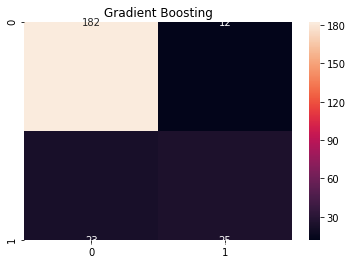

In [8]:
grad_ens_conf_matrix      = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

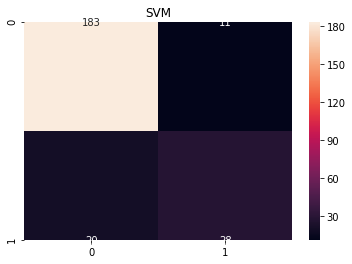

In [9]:
svm_svc_conf_matrix       = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

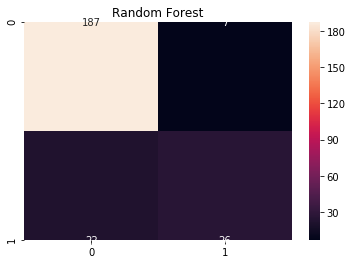

In [10]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

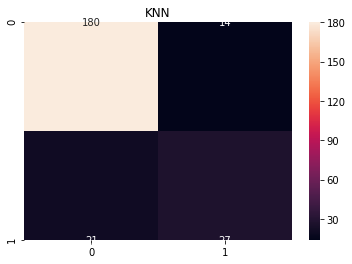

In [11]:
k_neighbors_conf_matrix   = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
sns.heatmap(k_neighbors_conf_matrix, annot=True,  fmt='');
title = 'KNN'
plt.title(title);

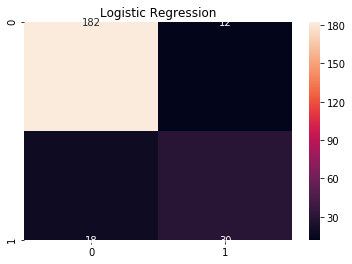

In [12]:
logistic_reg_conf_matrix  = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
sns.heatmap(logistic_reg_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

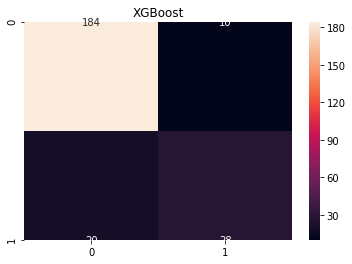

In [13]:
xgboost_reg_conf_matrix  = metrics.confusion_matrix(y, stratified_cv(X, y, XGBClassifier))
sns.heatmap(xgboost_reg_conf_matrix, annot=True,  fmt='');
title = 'XGBoost'
plt.title(title);

### Classification Reports

In [6]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))

print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))

print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))

print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

print('XGBoost:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, XGBClassifier))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       194
           1       0.78      0.58      0.67        48

    accuracy                           0.88       242
   macro avg       0.84      0.77      0.80       242
weighted avg       0.88      0.88      0.88       242


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       194
           1       0.33      0.02      0.04        48

    accuracy                           0.80       242
   macro avg       0.57      0.51      0.46       242
weighted avg       0.71      0.80      0.72       242


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       194
           1       0.81      0.46      0.59        48

    accuracy                           0.87       242
   macro avg       0.85      0.72     

### AUC Curves

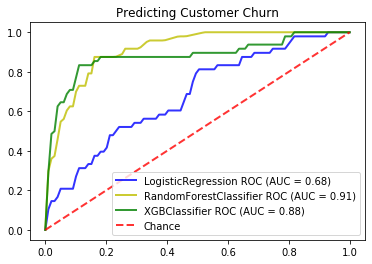

In [7]:
seed = 1234

# Plotting Setup
fig, ax = plt.subplots()

# plotROCCurve(clf_class, X, y, axis, random_state, **kwargs)

# ROC Curve Plotting
lr = linear_model.LogisticRegression
plotROCCurve(lr, X=X,y=y,axis=ax,color='b',random_state=seed,C=10, class_weight='balanced', solver='liblinear')

# Random Forest ROC Curve Plotting
rf = ensemble.RandomForestClassifier
plotROCCurve(rf, X,y,ax,'y',seed)

# XGBoost ROC Curve Plotting
xgb = XGBClassifier
plotROCCurve(xgb, X,y,ax,'g',seed)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Predicting Customer Churn")
ax.legend(loc="lower right")
plt.show()

In [13]:
rf = ensemble.RandomForestClassifier().fit(X,y)

pd.DataFrame(rf.feature_importances_, index=xcolnames, columns=["Importance"]).sort_values(by="Importance", ascending=False).head(n=20)

,Importance
MRR,0.089910
timescontacted,0.058431
callsPerQuarter,0.058355
daysAsCustomer,0.057820
gauge_Red,0.051380
assoccontacts,0.050690
sessionsPerDay,0.044700
employees,0.044558
associateddeals,0.043810
sessions,0.042670
